<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/13_knn_select_best_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# KNN elegir el mejor k


El valor de K en KNN corresponde con el número de instancias a tener en cuenta a la hora de determinar la afinidad con las clases.

Este método supone que los vecinos más cercanos (k) nos dan la mejor clasificación y esto se hace utilizando todos los atributos; el problema de dicha suposición es que es posible que se tengan muchos atributos irrelevantes que dominen sobre la clasificación: dos atributos relevantes perderían peso entre otros veinte irrelevantes.

Para corregir el posible sesgo se puede asignar un peso a las distancias de cada atributo, dándole así mayor importancia a los atributos más relevantes.



In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error

%matplotlib inline



Vamos a realizar intentar determinar el número óptimo de vecinos para el iris dataset, en el que tenemos 3 clases.



Cargamos los datos

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target



Vemos que tenemos 4 variables (iris.feature_names) con las que hacer la clasificación.

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']



Sin embargo, para nuestro ejemplo nos vamos a quedar tan solo con las 2 primeras. De este modo podemos hacer una respresentación gráfica y comprobar las diferencias al seleccionar varios valores de k.



Nos quedamos con las 2 primeras features

In [4]:
X = X[:, :2]



Standarizamos los datos

In [5]:
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)



Establecemos un valor arbitrario de vecinos

In [6]:
k = 20



Ajustamos un KNN con los k vecinos indicados antes

In [7]:
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', n_jobs=-1).fit(X_std, y)



Dibujamos el contorno. y asignamos colores a los puntos y las áreas clasificadoras.

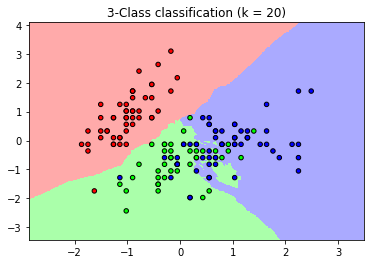

In [8]:
# Defining the color map.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size.

x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Get the predictions.

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


# Return the data with its respective classification.

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_std[:, 0], X_std[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (k))

plt.show()



Para evitar este proceso de probar varios k's hasta dar con el adecuado, y que en este caso podemos hacer de forma gráfica al tener sólo 2 dimensiones, usamos el método GridSearchCV que nos ofrece scikit-learn y permite hacer una búsqueda a través de varias opciones.

In [9]:
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1)

# We define the pipeline.
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

# We define the search space for testing the different values of k.
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]



Creamos la rejlla de optimización y ajustamos los modelos

In [10]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_std, y)



Del mejor modelo clasificador obtenemos el mejor valor de k

In [11]:
clf.best_estimator_.get_params()['knn__n_neighbors']

5



# Ejercicios



## Ejercicio 1 

En algoritmo KNN se puede usar tanto para clasificación como para **regresión** y se encuentra implementado en scikit-learn, importándolo del siguiente modo:

from sklearn.neighbors import KNeighborsRegressor

Del mismo modo que cualquier modelo de regresión, tenemos la métrica mean_squared_error (mejor cuanto más pequeño sea el valor) con el que evaluar el modelo, y que se puede usar mediante este código:

from sklearn.metrics import mean_squared_error

mean_squared_error(y_real, y_pred)

Dados los datos generados en la celda inferior X e y


In [12]:
import numpy as np
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()



- a. Determine de forma manual cúal es el número optimo de k's
- b. Encuentre el valor óptimo de k mediante un GridSearchCV




Determine de forma manual cúal es el número optimo de k's.

In [13]:
# Respuesta aqui



Encuentre el valor óptimo de k mediante un GridSearchCV

In [14]:
# Respuesta aqui



## Ejercicio 2 

Usando de nuevo el iris dataset empleado anteriormente, evalúe como afecta en el valor de k el uso de los distintos algoritmos que permiten calcular la distancia entre puntos. Estas lista de algoritmos se encuentra recogida en el parámetro 'algorithm' accesible ejecutando este código:

help(KNeighborsClassifier)



- a. Obtenga la lista de algoritmos disponibles
- b. Encuentre el valor óptimo de k mediante un GridSearchCV con todos los algoritmos posibles para el parámetro 'algorithm'




Obtenga la lista de algoritmos disponibles

In [15]:
# Respuesta aqui



Encuentre el valor óptimo de k mediante un GridSearchCV con todos los algoritmos posibles para el parámetro 'algorithm'

In [16]:
# Respuesta aqui